In [55]:
# Importing libraries
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
## test

# scikit learn packages 
from sklearn.feature_extraction.text import TfidfVectorizer # vectorizer
from sklearn.model_selection import train_test_split # For splitting into test and train data
from sklearn.linear_model import SGDClassifier # SGD classifier - better model for classification
from sklearn.pipeline import Pipeline # Pipeline framework
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score, cohen_kappa_score
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold


In [122]:
# Path to the data
#data_ghelms = "/Users/gustavhelms/Documents/Cognitive Science/5_semester/Bachelor/political_polarization/Folketinget-Scraping/data/folketinget_2019_2021_raw.csv"
data_mrg = "./data/folketinget_2019_2021_raw.csv"
# Importing data - only a subset 
#df = pd.read_csv(data_ghelms)
df = pd.read_csv(data_mrg)

In [3]:
df['Parti'].value_counts()

Socialdemokratiet              11194
Venstre                         9737
Dansk Folkeparti                8793
Socialistisk Folkeparti         5496
Enhedslisten                    5181
Radikale Venstre                4044
Nye Borgerlige                  3503
Det Konservative Folkeparti     2361
Alternativet                    2190
Liberal Alliance                2150
Socialdemokraterne               366
Name: Parti, dtype: int64

# Implementing Pipeline

In [123]:
df2019 = df[df['Year'] == 2019][:500]
df2020 = df[df['Year'] == 2020][:500]
df2021 = df[df['Year'] == 2021][:500]
df1500 = pd.concat([df2019, df2020, df2021])

In [4]:
# Splitting data
X, y = df1500['text'], df1500['Parti']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify = df1500["Parti"])

In [5]:
pipe = Pipeline([
('vect', TfidfVectorizer(ngram_range=(1,2))),
('SGD', SGDClassifier(loss='log', 
                      penalty='l2', 
                      shuffle=True,
                      alpha=1e-2,
                      class_weight = 'balanced'))])

grid = GridSearchCV(estimator = pipe,
                        param_grid = {'SGD__alpha': (1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8)},
                        cv=20, # number of cross validations
                        scoring={'kappa_score': make_scorer(cohen_kappa_score)},
                        refit='kappa_score',
                        n_jobs=2)

In [6]:
# fitting hyper parameters
grid.fit(X_train, y_train)

GridSearchCV(cv=20,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(ngram_range=(1, 2))),
                                       ('SGD',
                                        SGDClassifier(alpha=0.01,
                                                      class_weight='balanced',
                                                      loss='log'))]),
             n_jobs=2,
             param_grid={'SGD__alpha': (0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                        1e-07, 1e-08)},
             refit='kappa_score',
             scoring={'kappa_score': make_scorer(cohen_kappa_score)})

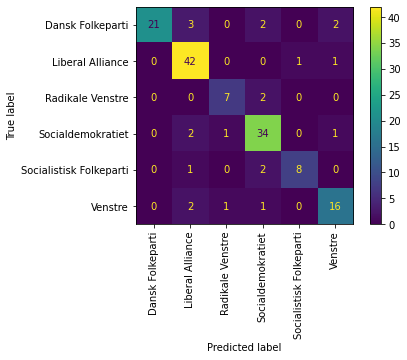

In [13]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(grid, X_test, y_test, xticks_rotation = "vertical")
plt.show()

In [66]:
y_pred = grid.predict(X_test)

In [39]:
# inspect results
results = pd.DataFrame(grid.cv_results_)

In [18]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SGD__alpha,params,split0_test_kappa_score,split1_test_kappa_score,split2_test_kappa_score,split3_test_kappa_score,...,split13_test_kappa_score,split14_test_kappa_score,split15_test_kappa_score,split16_test_kappa_score,split17_test_kappa_score,split18_test_kappa_score,split19_test_kappa_score,mean_test_kappa_score,std_test_kappa_score,rank_test_kappa_score
0,1.515766,0.097167,0.072874,0.015395,0.01,{'SGD__alpha': 0.01},0.196364,0.282051,0.346350,0.174256,...,0.249533,0.286788,0.197605,0.326845,0.267645,0.245779,0.300369,0.262951,0.047162,7
1,1.526714,0.071156,0.068675,0.006714,0.001,{'SGD__alpha': 0.001},0.670468,0.731755,0.727767,0.769946,...,0.725731,0.702751,0.563130,0.685723,0.746360,0.641818,0.727008,0.711519,0.048699,6
2,1.477653,0.133227,0.073800,0.013308,0.0001,{'SGD__alpha': 0.0001},0.731301,0.810268,0.769035,0.828619,...,0.785694,0.805572,0.687464,0.767294,0.845800,0.744949,0.826674,0.788097,0.040371,5
3,1.364588,0.022177,0.067851,0.006320,0.00001,{'SGD__alpha': 1e-05},0.770206,0.809843,0.828042,0.847875,...,0.825521,0.804494,0.727167,0.807139,0.865385,0.765529,0.846945,0.811664,0.036330,3
4,1.933507,0.681973,0.087408,0.027272,0.000001,{'SGD__alpha': 1e-06},0.831079,0.887572,0.829858,0.795349,...,0.884748,0.848245,0.791690,0.866344,0.885731,0.867214,0.846813,0.841195,0.038570,1
5,1.685346,0.120441,0.079829,0.015269,0.0,{'SGD__alpha': 1e-07},0.759456,0.850795,0.774149,0.812930,...,0.848758,0.827862,0.751640,0.885110,0.774221,0.826624,0.793442,0.818297,0.046886,2
6,1.554418,0.061680,0.074967,0.012037,0.0,{'SGD__alpha': 1e-08},0.741585,0.812981,0.849724,0.793655,...,0.847857,0.772367,0.751852,0.867252,0.886441,0.790803,0.772431,0.799382,0.050013,4


In [ ]:
set(df['Parti'])

{'Alternativet',
 'Dansk Folkeparti',
 'Det Konservative Folkeparti',
 'Enhedslisten',
 'Liberal Alliance',
 'Nye Borgerlige',
 'Radikale Venstre',
 'Socialdemokraterne',
 'Socialdemokratiet',
 'Socialistisk Folkeparti',
 'Venstre'}

# Loop through years and fit/predict per year, append scores and so on

In [ ]:
# Defining the pipe
pipe = Pipeline([
('vect', TfidfVectorizer(ngram_range=(1,2))),
('SGD', SGDClassifier(loss='log', 
                      penalty='l2', 
                      shuffle=True,
                      alpha=1e-2,
                      class_weight = 'balanced'))])

grid = GridSearchCV(estimator = pipe,
                        param_grid = {'SGD__alpha': (1e-3, 1e-4, 1e-5, 1e-6, 1e-7)},
                        cv=20, # number of cross validations
                        scoring={'kappa_score': make_scorer(cohen_kappa_score)},
                        refit='kappa_score',
                        n_jobs=2)

In [120]:
# Creating data frame to append to
cv_results = pd.DataFrame(columns = ["Year","k_fold","alpha","accuracy_score",
                                     "precision_score","recall_score","kappa_train", 
                                     "kappa_test", "y_test","y_pred"])

for year in df.Year.unique():
    print("Year: {}".format(year))
    # Subsetting the data pr. year
    session_data = df[df['Year'] == year][:500]
    
    # Defining the folds
    skf = StratifiedKFold(n_splits=3,shuffle=True,random_state = 1234)
    
    # Looping through each fold. 
    for i, (train_index, test_index) in enumerate(skf.split(session_data, session_data["Parti"].values)):
    
        # Dividing into train and test set
        train = session_data.iloc[train_index]
        test = session_data.iloc[test_index]

        # Giving labels 
        X_train, y_train = train["text"], train["Parti"]
        X_test, y_test = test["text"], test["Parti"]

        # Fitting the grid
        print("Fitting the grid for year: {} and fold {}".format(year, i+1))
        grid.fit(X_train, y_train)

        # save best kappa score and params generating that score
        kappa_train = grid.best_score_
        alpha = grid.best_params_.get("SGD__alpha")

        # metrics on test set
        print("Predicting and extracting scores")
        y_pred = grid.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        kappa_test = cohen_kappa_score(y_test, y_pred)

        # Adding the values to a dictionary
        hep = {"Year": year, "k_fold": i+1, "alpha": alpha, "accuracy_score": accuracy, 
               "precision_score": precision, "recall_score": recall, "kappa_train": kappa_train, "kappa_test": kappa_test,
              "y_test": y_test.tolist(), "y_pred": y_pred}
                          
        # Appending to the final dataframe
        cv_results = cv_results.append(hep, ignore_index = True)
        
print("FINISH")
                          

Year: 2021
Fitting the grid for year: 2021 and fold 1
Predicting and extracting scores
Fitting the grid for year: 2021 and fold 2
Predicting and extracting scores
Fitting the grid for year: 2021 and fold 3
Predicting and extracting scores
Year: 2020
Fitting the grid for year: 2020 and fold 1
Predicting and extracting scores
Fitting the grid for year: 2020 and fold 2
Predicting and extracting scores
Fitting the grid for year: 2020 and fold 3
Predicting and extracting scores
Year: 2019
Fitting the grid for year: 2019 and fold 1
Predicting and extracting scores
Fitting the grid for year: 2019 and fold 2
Predicting and extracting scores
Fitting the grid for year: 2019 and fold 3
Predicting and extracting scores


In [121]:
cv_results

,Year,k_fold,alpha,accuracy_score,precision_score,recall_score,kappa_train,kappa_test,y_test,y_pred
0,2021,1,1.000000e-06,0.892216,0.899368,0.892216,0.761248,0.861007,"[Dansk Folkeparti, Dansk Folkeparti, Dansk Fol...","[Dansk Folkeparti, Dansk Folkeparti, Dansk Fol..."
1,2021,2,1.000000e-06,0.820359,0.822011,0.820359,0.775976,0.772024,"[Dansk Folkeparti, Dansk Folkeparti, Dansk Fol...","[Venstre, Socialistisk Folkeparti, Dansk Folke..."
2,2021,3,1.000000e-06,0.867470,0.871608,0.867470,0.773318,0.831643,"[Dansk Folkeparti, Dansk Folkeparti, Dansk Fol...","[Socialdemokratiet, Dansk Folkeparti, Dansk Fo..."
3,2020,1,1.000000e-08,0.940120,0.940120,0.940120,0.826092,0.888696,"[Dansk Folkeparti, Dansk Folkeparti, Dansk Fol...","[Dansk Folkeparti, Dansk Folkeparti, Dansk Fol..."
4,2020,2,1.000000e-08,0.916168,0.918332,0.916168,0.873737,0.838055,"[Dansk Folkeparti, Dansk Folkeparti, Dansk Fol...","[Liberal Alliance, Liberal Alliance, Liberal A..."
5,2020,3,1.000000e-08,0.927711,0.933380,0.927711,0.821055,0.867606,"[Dansk Folkeparti, Dansk Folkeparti, Dansk Fol...","[Dansk Folkeparti, Dansk Folkeparti, Dansk Fol..."
6,2019,1,1.000000e-06,0.820359,0.822990,0.820359,0.692756,0.776996,"[Liberal Alliance, Liberal Alliance, Liberal A...","[Radikale Venstre, Liberal Alliance, Liberal A..."
7,2019,2,1.000000e-06,0.760479,0.768529,0.760479,0.639534,0.703190,"[Liberal Alliance, Liberal Alliance, Liberal A...","[Liberal Alliance, Liberal Alliance, Liberal A..."
8,2019,3,1.000000e-06,0.789157,0.792461,0.789157,0.667240,0.736424,"[Dansk Folkeparti, Liberal Alliance, Liberal A...","[Liberal Alliance, Liberal Alliance, Liberal A..."


In [151]:
sorted(df.Year.unique())

[2019, 2020, 2021]